# 第七次课后练习

**负责助教：胡天成**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第七次课后练习+姓名+学号.ipynb, 例如 第七次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第六次课后练习+张三+1000000000+#.ipynb</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## **0.1** Numpy条件筛选

In [4]:
A = np.array([[ 3, -2,  0,  7, -5],
              [ 0,  4, -1,  9, -8],
              [ 6, -3,  2,  0, -4],
              [ 1, -7,  5, -6,  0],
              [ 8, -9,  0,  3, -2]])

# 使用 np.where 实现条件替换
result = np.where(A > 0, 1, np.where(A < 0, -1, A))

print(result)

[[ 1 -1  0  1 -1]
 [ 0  1 -1  1 -1]
 [ 1 -1  1  0 -1]
 [ 1 -1  1 -1  0]
 [ 1 -1  0  1 -1]]


[[ 1 -1  0  1 -1]

 [ 0  1 -1  1 -1]

 [ 1 -1  1  0 -1]

 [ 1 -1  1 -1  0]

 [ 1 -1  0  1 -1]]

```python
numpy.where(condition, [x, y])
1.condition:表示条件(bool)
2.x, y:可选,表示当条件为真时返回 x 的值,否则返回 y 的值。
```
所以这里把原数>0的替换成1，把<=0的替换成np.where(A < 0, -1, A)，也即，若满足<0，则返回-1，即把<0的替换成-1；若=0，则返回A，即返回原值0。 （本题即返回sgn(x)）

In [ ]:
import numpy as np

B = np.array([[0.1, 0.4, 0.8, 0.2],
              [0.5, 0.6, 0.9, 0.3],
              [0.7, 0.2, 0.1, 0.5],
              [0.4, 0.8, 0.6, 0.0]])

# 使用 np.clip 实现范围限制
result = np.clip(B, 0.3, 0.7)
# 同：result = np.clip(B, a_min = 0.3, a_max = 0.7)

print(result)

[[0.3 0.4 0.7 0.3]
 [0.5 0.6 0.7 0.3]
 [0.7 0.3 0.3 0.5]
 [0.4 0.7 0.6 0.3]]


[[0.3 0.4 0.7 0.3]

 [0.5 0.6 0.7 0.3]

 [0.7 0.3 0.3 0.5]
 
 [0.4 0.7 0.6 0.3]]

作truncate，把所有<0.3的替换成0.3, >0.7的替换成0.7。

In [3]:
arr = np.array([[0, 1, 11],
                [6, 5, 6],
                [7, 2, 9]])

idx = np.where(arr > 5)
print(idx)
print(np.extract(arr>5, arr))
print(arr.clip(2, 7))
print(arr[idx])

(array([0, 1, 1, 2, 2]), array([2, 0, 2, 0, 2]))
[11  6  6  7  9]
[[2 2 7]
 [6 5 6]
 [7 2 7]]
[11  6  6  7  9]


[0, 1, 1, 2, 2]

[2, 0, 2, 0, 2]

[11, 6, 6, 7, 9]

[[2, 2, 7],

 [6, 5, 6],

 [7, 2, 7]]

[11, 6, 6, 7, 9]

二维数组，所以
```python
np.where(arr > 5)
```
<mark>返回两个索引数组，分别为>5的位置的x分量数组和y分量数组（x和y分量一一对应的关系）。故为：[0, 1, 1, 2, 2]（行分量坐标）, [2, 0, 2, 0, 2] (列分量坐标) (先行后列按顺序找)</mark>

extract会提取摊平数组中按顺序取出所有arr值大于5的数，返回一维数组。

clip是作truncate, 所有数对2取max、对7取min。

arr[idx]是按顺序取出所有arr值大于5的数，同样摊平成1维数组。

## **0.2** 数据分布的中心化、标准化

In [5]:
np.random.seed(2023)
data = np.random.normal(loc=[5.0, 20.0],  
                        scale=[2.0, 5.0], 
                        size=(1000, 2))   

centered_data = data - data.mean(axis=0)
print(centered_data.shape)
data

(1000, 2)


array([[ 6.42334706, 18.37757522],
       [ 2.99625872, 21.18125397],
       [ 4.79568032, 14.29353687],
       ...,
       [ 6.61171657, 23.08123449],
       [ 3.29486106, 26.55732137],
       [ 3.7378763 , 15.75464219]])

data是返回(1000, 2)形状的Gaussian分布，这两列的均值为[5.0, 20.0]，但之后都中心化（都减去期望）变成期望为0的分布；两列的标准差为[2.0, 5.0]。

centered_data是(1000, 2)形状（因为减法时也把data.mean(axis=0)广播成这个形状了）

In [ ]:
std_data = (data - data.mean(axis=0)) / data.std(axis=0)
print(round(std_data[:, 1].std(), 2))
print(np.round(centered_data.mean(axis=0), 3))

1.0
[0. 0.]


std_data是标准化，两列都除以标准差，故变成期望为0，标准差为1的分布。

然后round是四舍五入，输出的是四舍五入保留两位小数的第二列的标准差，标准化后标准差为1

第三行输出的是四舍五入保留三位小数的两列的每列期望，中心化后期望为0

## **0.3** 矩阵的特征值与特征向量

In [9]:
# 认真理解代码的意思，观察理解运行结果
# 生成二维数据
np.random.seed(2023)
X = np.random.multivariate_normal(
    mean=[5, 20], 
    cov=[[4, 3], [3, 9]],  # 协方差矩阵
    size=200
)

# 数据预处理
centered_X = X - X.mean(axis=0)
cov_matrix = centered_X.T @ centered_X / (X.shape[0]-1)  
print(cov_matrix)

[[ 4.24251943  3.45521972]
 [ 3.45521972 10.23049968]]


X中心化，然后协方差矩阵为$\frac{1}{N}X^T*X$。这里用无偏修正，故除以$N-1$

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vecs)

[[-0.90963286 -0.41541312]
 [ 0.41541312 -0.90963286]]


eig_vals, eig_vecs分别为cov_matrix的特征值和特征向量（由于cov为$2*2$，所以eig_vals是(2,)的，eig_vecs是(2,2)的,并且是对应的）

由于$X^T*X$是实对称的，可以<mark>正交对角化</mark>。所以两个特征向量在标准实内积下正交（其实不同特征值对应的特征空间正交）

Text(0.5, 1.0, 'Eigenvectors Visualization')

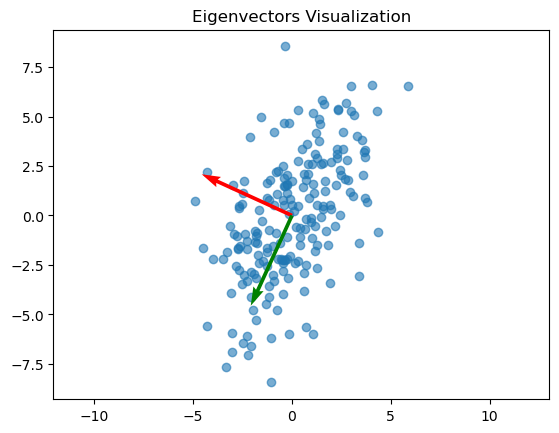

In [17]:
plt.scatter(centered_X[:,0], centered_X[:,1], alpha=0.6)
origin = [0,0]
plt.quiver(*origin, *eig_vecs[:,0], color='r', scale=5)
plt.quiver(*origin, *eig_vecs[:,1], color='g', scale=5)
plt.axis('equal')
plt.title("Eigenvectors Visualization")

绘图

# 第一部分 代码填空

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## **1.1** numpy的条件筛选

**Step 1.** 通过where函数找出数学成绩（第三列）不及格的学生行索引

**Step 2.** 通过clip函数将物理成绩（第5列）中超过100分的修正为100

**Step 3.** 通过extract函数提取所有化学成绩（第4列）在90-100之间的成绩

In [5]:
np.random.seed(2023)
scores = np.random.randint(0, 105, size=(50, 5))  # 50名学生，5门科目

# 找出数学科目（第3列）不及格的学生的行索引
math_col = 2
fail_math = np.where(scores[:, math_col] > 3)  # 填空处
print("数学不及格人数:", len(fail_math[0]))

# 将物理成绩（第5列）中超过100分的修正为100
physics_col = 4
scores[:, physics_col] = np.clip(scores[:, physics_col], None, 100)  # 填空处
print("物理修正后最大值:", scores[:, physics_col].max())

# 提取所有化学成绩（第4列）在90-100之间的成绩
chem_col = 3
top_chem = np.extract(np.logical_and(scores[:, chem_col] >= 90, scores[:, chem_col] <= 100),scores[:, chem_col])  # 填空处
print("化学尖子生人数:", top_chem.size)

数学不及格人数: 49
物理修正后最大值: 100
化学尖子生人数: 6


## **1.2** 主成分分析（PCA）

使用`numpy`对如下矩阵进行降维处理（降到2维）


In [3]:
#这是一个 5×6的矩阵，表示 5 个样本，每个样本有 6 个特征。

A = np.array([[84,65,61,72,79,81],[64,77,77,76,55,70],[65,67,63,49,57,67],[74,80,69,75,63,74],[84,74,70,80,74,82]])

#TODO：1.去中心化；2.计算协方差矩阵；3.计算特征值与特征向量；4.计算主成分贡献率以及累计贡献率

A = A - np.mean(A, axis = 0)

cov_matrix = A.T @ A / (A.shape[0] - 1) # 无偏修正

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
indices = eig_vals.argsort()[::-1]
eig_vals = eig_vals[indices]
eig_vecs = eig_vecs[:, indices]

# print(eig_vals)
# print(eig_vecs)

eig_vals_ratio = eig_vals / np.sum(eig_vals)
eig_vals_ratio_cumulative = np.cumsum(eig_vals_ratio)

print("主成分贡献率:", eig_vals_ratio)
print("累计贡献率", eig_vals_ratio_cumulative)


主成分贡献率: [6.35067780e-01 3.39021998e-01 2.05121906e-02 5.39803100e-03
 8.50810079e-17 1.72568306e-17]
累计贡献率 [0.63506778 0.97408978 0.99460197 1.         1.         1.        ]


In [ ]:
# todo：对上述矩阵进行降维处理（降到2维），可以使用`sklearn`，或者用numpy先生成特征向量基，然后做投影变换。

#another solution:
#from sklearn.decomposition import PCA
#model = PCA(n_components = 2)
#model.fit(A)

#A_reduced = model.transform(A)
#-------------------------
top_two = eig_vecs[:, :2]
A_reduced = A @ top_two
# print(A_reduced)


[[-16.14860528  12.48396235]
 [ 10.61676743 -15.67317428]
 [ 23.40212697  13.607117  ]
 [ -0.43966353  -7.77054621]
 [-17.43062559  -2.64735885]]


绘制`PCA`降维后的二维散点图

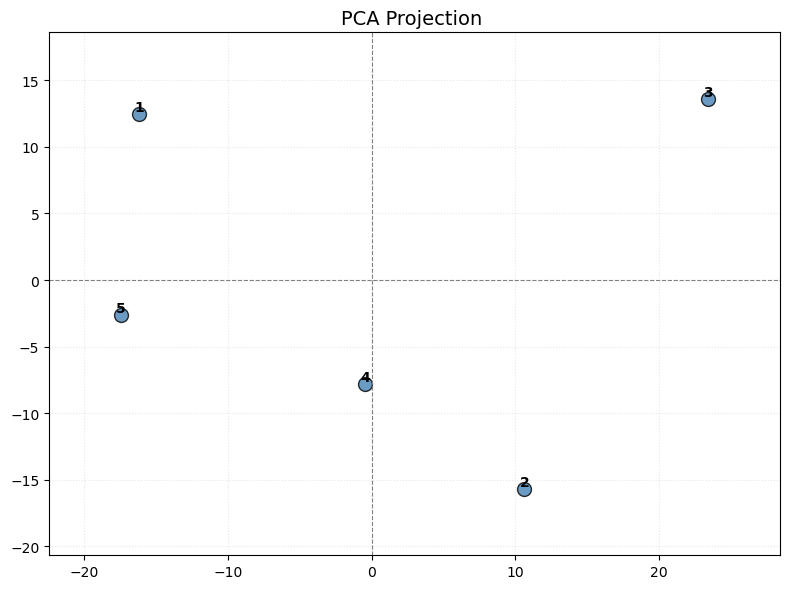

In [22]:
import matplotlib.pyplot as plt

# 提取降维之后的矩阵特征值
pc1 = A_reduced[:, 0]     # 维度1
pc2 = A_reduced[:, 1]     # 维度2

# 创建画布
plt.figure(figsize=(8, 6))

# 绘制散点图
plt.scatter(pc1, pc2, c='steelblue', edgecolor='k', s=100, alpha=0.8)

# 添加样本标签
for i, (x, y) in enumerate(zip(pc1, pc2)):
    plt.text(x, y, str(i+1), 
             ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.title('PCA Projection ', fontsize=14)

# 添加参考线和网格
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(alpha=0.3, linestyle=':')

# 设置坐标轴范围
margin = 5
plt.xlim(min(pc1)-margin, max(pc1)+margin)
plt.ylim(min(pc2)-margin, max(pc2)+margin)

# 显示图形
plt.tight_layout()
plt.show()

